# **Class Implementation of Single Neuron Model**

## Introduction
Our single neuron models consist of a single neuron or node, that sums weighted multiplications of the features of an input sample, adds a bias term, and then passes that sum through some activation function. For regression, we will use a linear activation function, i.e., just the identity function. For classification, we will use a sigmoid function.

More specifically, our single neuron model will take the dot product of an input training example $x^{(i)}$ with some learned weights $w$ and adding a learned bias $w_0$ to produce a pre-activation $z$. We then apply some activation function $f$ to $z$ to produce an activation $a$, which for this single neuron will be our output prediction $\hat{y}$. Importantly, $x$ and $w$ can be vectors, which we will now represent as NumPy arrays in our Python code. We will use a subscript notation, e.g., $x_j$ to indicate feature $j$ within data input $x$, where $j$ goes from 1 to $m$ total features.

The following is the formal mathematical notation for our single neuron model:  

$$
z = x \cdot w^T + w_0\\
a = f(z) \\
y = a
$$

where $x$ and $w$ are row vectors, and the activation function $f$ operates element-wise on the vector $z.$ to produce a scalar $a.$




In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Single Neuron Model Base Class
We will create a SingleNeuronModel class that will act as the parent class for different types of single neuron models, including classification.

For each of these classes, the member variables $w$ and $w_0$ remain the same along with the **forward** function.

The **activation** and **gradient** functions will be left unimplemented in our parent class and each child will need to implement them on their own! This is what differentiates our single neuron models. Below we include an implementation of the SingleNeuronModel parent class.

In [2]:
#Base model class with abstract methods that are implemented by the Regression and classification model
class SingleNeuronModel():
    def __init__(self, in_features):
        #self.w = np.zeros(in_features)
        #self.w_0 = 0.
        # Better, we set initial weights to small normally distributed values.
        self.w = 0.01 * np.random.randn(in_features)
        self.w_0 = 0.01 * np.random.randn()
        self.non_zero_tolerance = 1e-8 # add this to divisions to ensure we don't divide by 0


    def forward(self, x):
        if (x.shape != self.w.shape):
            raise ValueError("Shape of weights and features do not match")
        
        # Calculate and save the pre-activation z
        self.z = x @ self.w.T + self.w_0

        # Apply the activation function, and return
        self.a = self.activation(self.z)
        return self.a

    def activation(self, z):
        raise ImplementationError("activation method should be implemented by subclass")

    # calculate and save gradient of our output with respect to weights
    def gradient(self, x):
        raise ImplementationError("gradient method should be implemented by subclass")

    # update weights based on gradients and learning rate
    def update(self, grad_loss, learning_rate):
        self.w   -= grad_loss * self.grad_w   * learning_rate
        self.w_0 -= grad_loss * self.grad_w_0 * learning_rate



## Single Neuron Regression Model:

In the following code block, we implement the necessary setup for a single neuron regression model class in Python. This will use a linear function $f(z) = z$ as the activation function and is very similar in functionality to what we created in the last notebook.

we would like to minimize a cost function, $J$, where $J$ is the total *loss* $L$ over our training data:

$$ J = \sum_i^n L(\hat{y}^{(i)}, y^{(i)})$$

For this simple example, we will use squared error (SE) loss where $\epsilon^{(i)}$ is our error for any given sample $i$:

$$ L_{SE}(\hat{y}^{(i)}, y^{(i)}) = \frac{1}{2} (\hat{y_i} - y_i)^2 = \frac{1}{2} \epsilon^2 $$


Additionally,
* We will perform the training loop for a specified number of iterations through our dataset, also known as epochs.
* In each epoch, we will look at each input and output $(x^{(i)},y^{(i)})$ pair. For each pair, we:

  * Calculate the loss $L$ between the correct value $y$ and the predicted value $\hat{y}$
  * Calculate the gradient of the loss with respect to each weight, and
  * Update the weights based on the gradient and the learning rate, $\eta$:
  
$$ w_{j,new} = w_j - \eta \frac{dJ}{dw_j}$$


Although we are implementing our Single Neuron Model in a class, the basic concept of gradient based learning stays the same. We are still nudging each weight along the gradient of the cost funtion with respect to that weight. However the location of where those weights is stored is different and within each instance of our class.

### Gradient descent with squared error (SE) loss

We have repeated the gradient descent for Squared Error Loss here as a reference:

In the case of our squared error loss, for any sample data point $i$ this works out to:

$$ \frac{dJ}{dw_j} = \frac{dL_{SE}}{dw_j}  
  = \frac{dL_{SE}}{d\hat{y}} \frac{d\hat{y}}{dw_j}
  = (\hat{y} - y) \frac{d\hat{y}}{dw_j} $$

Importantly, we see that we need to be able to calculate the gradient of the model output $\hat{y}$ with respect to each weight:

$$ \frac{d\hat{y}}{dw_j} = \frac{df(z)}{dz} \frac{dz}{dw_j} $$

For the linear activation function $f(z) = z$, the first term is very simple: $\frac{df(z)}{dz} = 1$.

For the second term,

$$ z = w_0 + x_1 \cdot w_1 + \cdots + x_j \cdot w_j + \dots + x_m \cdot w_m $$

so $\frac{dz}{dw_j} = x_j$, except for $w_0$, where $\frac{dz}{dw_0} = 1.$

In [3]:
# Single neuron regression model.
class SingleNeuronRegressionModel(SingleNeuronModel):
    # Linear activation function for regression model
    def activation(self, z):
        return z

    # Gradient of output w.r.t. weights, for linear activation
    def gradient(self, x):
        self.grad_w = x
        self.grad_w_0 = 1.

In [4]:
def train_model_SE_loss(model, input_data, output_data, 
                        learning_rate, num_epochs):
    num_samples = len(input_data)
    for epoch in range(1, num_epochs+1):
        total_loss = 0 #keep track of total loss across the data set
            
        for i in range(num_samples):
            x = input_data[i,...]
            y = output_data[i]
            y_predicted = model.forward(x)

            # loss function
            error = y_predicted - y
            loss = (error**2)/2
            total_loss += loss

            # gradient of our prediction w.r.t. weights
            model.gradient(x)
            
            # gradient of loss w.r.t. prediction, for SE
            grad_loss = error 
            
            # update our model based on gradients
            model.update(grad_loss, learning_rate)
           
        report_every = max(1, num_epochs // 10)
        if epoch == 1 or epoch % report_every == 0: #every few epochs, report
            print("epoch", epoch, "has total loss", total_loss)

In [5]:
def evaluate_regression_accuracy(model, input_data, output_data):
    total_loss = 0
    num_samples = len(input_data)
    for i in range(num_samples):
        x = input_data[i,...]
        y = output_data[i]
        y_predicted = model.forward(x)
        error = y_predicted - y
        total_loss += (error**2)/2
    accuracy = total_loss / num_samples
    print("Our model has mean square error of", accuracy)
    return accuracy

## Single Neuron Regression Example
The data used for the single neuron model was the Sales revenue based on the advertising budget across different channels such as Radio, TV and Newspaper. The dataset has 200 samples. This simpler dataset enables us to visualize the results effectively

In [6]:
advertising = pd.read_csv(r'./data/advertising.csv')
advertising.head()


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [7]:
input_cols = ['TV', 'Radio','Newspaper']
output_col = 'Sales'
X_raw = advertising[input_cols].to_numpy()
y_raw = advertising[output_col].to_numpy().squeeze()

In [8]:
# Standardization (Z-score)
X = (X_raw - X_raw.mean())/X_raw.std()
y = (y_raw - y_raw.mean())/ y_raw.std()

In [9]:
# Initializing hyperparameters
learning_rate = 0.01
epoch = 100

In [10]:
# Test: regression model output for a single 2D datapoint:
model = SingleNeuronRegressionModel(in_features= X.shape[1])
train_model_SE_loss(model, X, y, learning_rate, epoch)
print("\nFinal weights:")
print(model.w, model.w_0)
evaluate_regression_accuracy(model, X, y)


epoch 1 has total loss 41.07281047740921
epoch 10 has total loss 11.980028027729617
epoch 20 has total loss 10.767401192494182
epoch 30 has total loss 10.332282711672674
epoch 40 has total loss 10.176653486238138
epoch 50 has total loss 10.121356199093592
epoch 60 has total loss 10.10192407352511
epoch 70 has total loss 10.095224216081865
epoch 80 has total loss 10.092992931488428
epoch 90 has total loss 10.092299102938359
epoch 100 has total loss 10.092115335818338

Final weights:
[ 0.80298581  1.56532548 -0.02220283] 0.05470055058801448
Our model has mean square error of 0.048863918863713544


0.048863918863713544

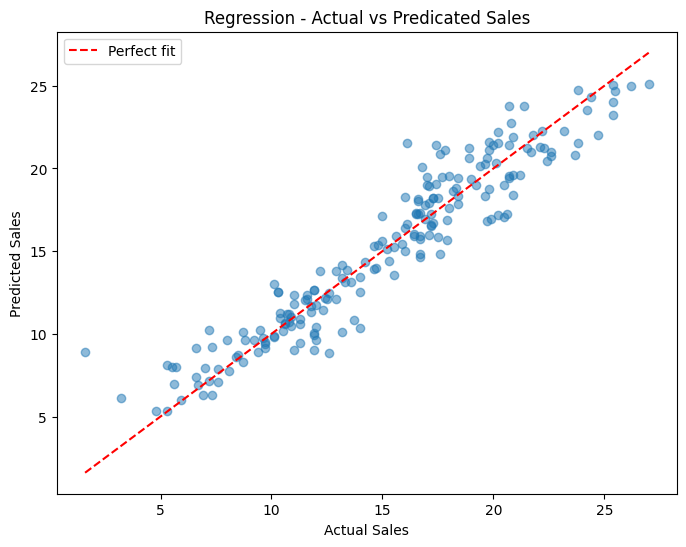

In [15]:
y_pred = np.array([model.forward(x) for x in X])
y_pred_rescaled = y_pred * y_raw.std() + y_raw.mean()
plt.figure(figsize = (8, 6))
plt.scatter(y_raw, y_pred_rescaled, alpha = 0.5)
plt.plot([y_raw.min(), y_raw.max()], [y_raw.min(), y_raw.max()], 'r--', label = 'Perfect fit')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Regression - Actual vs Predicated Sales')
plt.legend()
plt.show()


## Single Neuron Classification Model
For the classification problem, we will change the activation function to a sigmoid. The sigmoid function squashes the pre-activation $z$ down to an activation (output) that is between 0 and 1. We also need to implement the gradient calculation, with this sigmoid activation function. 

### Gradient descent with negative log-likelihood (NLL) loss

The gradient descent for negative log-likelihood Loss is provided here for reference.

In the case of our NLL loss, for any sample data point $i$, the gradient of $J$ with respect to weights works out to:

$$ \frac{dJ}{dw_j} = \frac{dL_{NLL}}{dw_j}  
  = \frac{dL_{NLL}}{d\hat{y}} \frac{d\hat{y}}{dw_j}  
  = \frac{dL_{NLL}}{d\hat{y}} \frac{d\hat{y}}{dz} \frac{dz}{dw_j} 
  = \frac{dL_{NLL}}{d\hat{y}} \frac{d\sigma{(z)}}{dz} \frac{dz}{dw_j} .
 $$

For the first term, the definition $L_{NLL} = y \log{\hat{y}} + (1-y)\log{(1-\hat{y})}$,
giving us the following after some algebra:

$$ \frac{dL_{NLL}}{d\hat{y}} = \frac{\hat{y} - y}{\hat{y}(1-\hat{y})} .$$

For the second term, our derivative of the activation function $\sigma(z)$, we get:

$$ \frac{d\sigma{(z)}}{dz} = \sigma(z)(1-\sigma(z)  = \hat{y}(1-\hat{y}).$$

And finally, the last term is simply $\frac{dz}{dw_j} = x$, except for $\frac{dz}{dw_0} = 1$.

In [12]:
# Single Neuron Classification model
class SingleNeuronClassificationModel(SingleNeuronModel):

    def __init__(self, in_features):
        self.non_zero_tolerance = 1e-8 # add this to divisions to ensure we don't divide by 0
        super().__init__(in_features)
        
    # Sigmoid activation function for classification
    def activation(self, z):
        return 1 / (1 + np.exp(-z) + self.non_zero_tolerance)

    # Gradient of output w.r.t. weights, for sigmoid activation
    def gradient(self, x):
        self.grad_w = self.a * (1-self.a) * x
        self.grad_w_0 = self.a * (1-self.a)

In [13]:
# Training process, using negative log likelihood (NLL) loss --
# appropriate for classification problems.

def train_model_NLL_loss(model, input_data, output_data,
                         learning_rate, num_epochs):
    non_zero_tolerance = 1e-8 # add this to the log calculations to ensure we don't take the log of 0
    num_samples = len(input_data)
    for epoch in range(1, num_epochs+1):
        total_loss = 0 #keep track of total loss across the data set

        for i in range(num_samples):
            x = input_data[i,...]
            y = output_data[i]
            y_predicted = model.forward(x)

            # NLL loss function
            loss = -(y * np.log(y_predicted + non_zero_tolerance) + (1-y) * np.log(1-y_predicted + non_zero_tolerance))
            total_loss += loss

            # gradient of prediction w.r.t. weights
            model.gradient(x)

            #gradient of loss w.r.t. prediction, for NLL
            grad_loss = (y_predicted - y)/(y_predicted * (1-y_predicted))

            # update our model based on gradients
            model.update(grad_loss, learning_rate)

        report_every = max(1, num_epochs // 10)
        if epoch == 1 or epoch % report_every == 0: #every few epochs, report
            print("epoch", epoch, "has total loss", total_loss)

In [14]:
# We will use this function to evaluate how well our trained classifier perfoms
def evaluate_classification_accuracy(model, input_data, labels):
    # Count the number of correctly classified samples given a set of weights
    correct = 0
    num_samples = len(input_data)
    for i in range(num_samples):
        x = input_data[i,...]
        y = labels[i]
        y_predicted = model.forward(x)
        label_predicted = 1 if y_predicted > 0.5 else 0
        if label_predicted == y:
            correct += 1
        else:
            print("Misclassify", x, y, "with activation", y_predicted)
    accuracy = correct / num_samples
    print("Our model predicted", correct, "out of", num_samples,
          "correctly for", accuracy*100, "% accuracy")
    return accuracy

## Single Neuron Classification Example

Now we turn to training the SingleNeuronClassificationModel.

The dataset used is a classic wine dataset and the task is to predict the wine color as red or white given its features

In [16]:
red_wine = pd.read_csv(r'./data/winequality-red.csv', delimiter=';', header = 0)
white_wine = pd.read_csv(r'./data/winequality-white.csv', delimiter=';', header = 0)

In [17]:
red_wine['color'] = 1
white_wine['color'] = 0

In [8]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [9]:
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0


In [18]:
wine_data = pd.concat([red_wine, white_wine])

In [19]:
wine_data = wine_data.sample(frac = 1).reset_index(drop = True)

In [20]:
input_cols = ["citric acid", "residual sugar", "total sulfur dioxide"]
output_col = ['color']

In [21]:
X = wine_data[input_cols].to_numpy()
y = wine_data[output_col].to_numpy().squeeze()

In [14]:
print("Shape of X:", X.shape)
print("Shape of Y:", y.shape)

Shape of X: (6497, 3)
Shape of Y: (6497,)


In [22]:
# Initializing hyperparameters
learning_rate = 0.001
epoch = 200

In [23]:
model = SingleNeuronClassificationModel(in_features=len(X[1]))

train_model_NLL_loss(model, X, y, learning_rate, epoch)
print("\nFinal weights:")
print(model.w, model.w_0)

epoch 1 has total loss 6576.3661128081585
epoch 20 has total loss 3539.2023229194197
epoch 40 has total loss 3310.013503876658
epoch 60 has total loss 3267.3835269805063
epoch 80 has total loss 3286.8932349670863
epoch 100 has total loss 3301.77253747108
epoch 120 has total loss 3311.045885623512
epoch 140 has total loss 3316.942968863512
epoch 160 has total loss 3319.7266311732355
epoch 180 has total loss 3320.313403343866
epoch 200 has total loss 3320.9333311166065

Final weights:
[-0.27445518 -0.4449221  -0.19908563] 11.958453637173164


In [21]:
evaluate_classification_accuracy(model, X, y)

Misclassify [  0.27   2.3  145.  ] 1 with activation 4.153523104780234e-08
Misclassify [7.0e-02 2.6e+00 8.6e+01] 1 with activation 0.0026557842146873885
Misclassify [ 0.   2.2 59. ] 1 with activation 0.3584684144413412
Misclassify [ 0.26  1.9  88.  ] 1 with activation 0.002569838902191607
Misclassify [ 0.25  3.4  85.  ] 1 with activation 0.002060646107688277
Misclassify [ 0.08  1.8  64.  ] 1 with activation 0.20919256793584912
Misclassify [ 0.37  1.7  62.  ] 1 with activation 0.2824780503988537
Misclassify [ 0.34  1.1  47.  ] 0 with activation 0.9034728928449711
Misclassify [ 0.44  2.3  68.  ] 1 with activation 0.08341961346438655
Misclassify [  0.49   2.8  111.  ] 1 with activation 1.9766132660523493e-05
Misclassify [ 0.48  1.1  58.  ] 0 with activation 0.5326796955957949
Misclassify [  0.36   6.1  102.  ] 1 with activation 1.9409450955892915e-05
Misclassify [ 0.3  0.9 28. ] 0 with activation 0.9974125938496426
Misclassify [ 0.73  6.55 76.  ] 1 with activation 0.0020350109638181306
Mi

0.9147298753270741

In [27]:
def plot3D_with_decision_plane(X, Y, w, w_0):
    """
    Plot 3D scatter plot of data points and decision boundary plane.
    For a single neuron classifier:
    Decision boundary is where: w[0]*x0 + w[1]*x1 + w[2]*x2 + w_0 = 0
    """
    fig = plt.figure(figsize=(12,9))
    ax = fig.add_subplot(111, projection='3d')
    Y_flat = Y.flatten()
    red_wine = X[Y_flat == 1]
    white_wine = X[Y_flat == 0]
    ax.scatter(red_wine[:,0], red_wine[:,1], red_wine[:,2], 
               c='r', label='Red Wine', alpha=0.5, s=20)
    ax.scatter(white_wine[:,0], white_wine[:,1], white_wine[:,2], 
               c='b', label='White Wine', alpha=0.5, s=20)
    
    x0_range = np.linspace(X[:,0].min(), X[:,0].max(), 30)
    x1_range = np.linspace(X[:,1].min(), X[:,1].max(), 30)
    x0_grid, x1_grid = np.meshgrid(x0_range, x1_range)

    #Calculate corresponding x2 values for the decision boundary plane
    if w[2] != 0:
        x2_grid = (-w_0 -w[0]*x0_grid - w[1]*x1_grid) / w[2]

        x2_min, x2_max = X[:,2].min(), X[:,2].max()
        x2_grid = np.clip(x2_grid, x2_min, x2_max)

        ax.plot_surface(x0_grid, x1_grid, x2_grid, alpha=0.3, color='green', 
                    edgecolor='none')
    ax.set_xlabel(input_cols[0])
    ax.set_ylabel(input_cols[1])
    ax.set_zlabel(input_cols[2])
    ax.set_title('Classification with Decision Boundary Plane')
    ax.legend()
    plt.show()



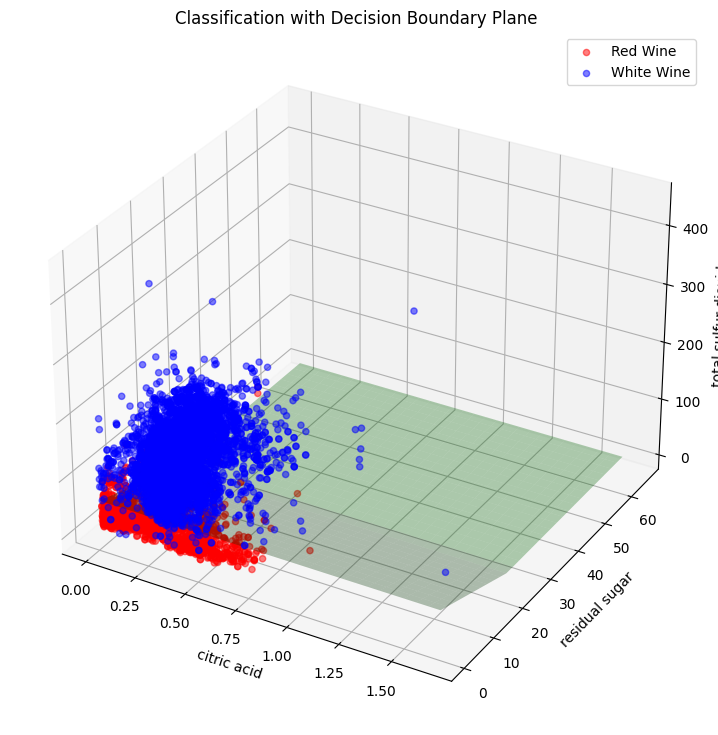

In [28]:

# Visualize the distribution in 2D
plot3D_with_decision_plane(X, y, model.w, model.w_0)

## Conclusion

Now although classes are a very powerful tool, they are still not powerful enough to allow our Single Neuron Model to determine good decision boundaries for non linearly separable data.

  [Pytorch library](https://pytorch.org/) uses all of the afore mentioned concepts to create extremely sophisticated Neural Networks that will allow us to tackle more complex datasets. 